## CUSTOMER CHURN PREDICTION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Loading Dataset
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
# Display first few rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Step 1: Data Cleaning & Preprocessing

In [4]:
# Drop irrelevant columns
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [5]:
# Encode categorical features
data = pd.get_dummies(data, drop_first=True)

In [6]:
# Display first few rows to confirm cleaning
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


### Step 2: Exploratory Data Analysis (EDA)

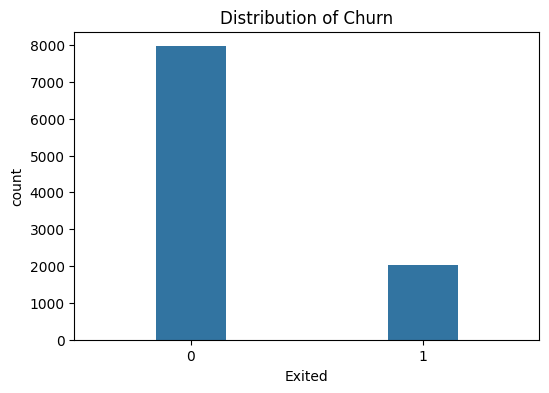

In [7]:
# Distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=data, width=0.3)
plt.title('Distribution of Churn')
plt.show()

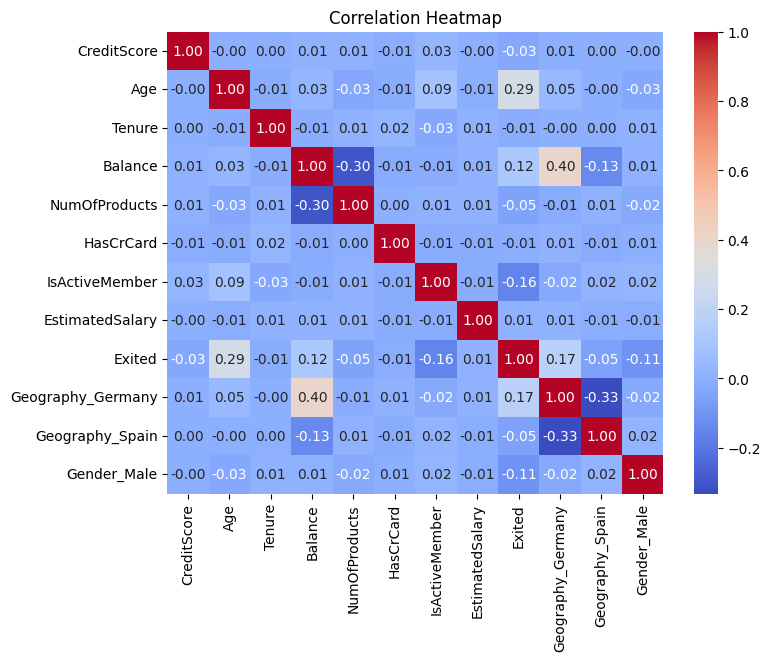

In [8]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Step 3: Feature Engineering

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
# Handling missing values (if any)
data.fillna(data.median(), inplace=True)

In [11]:
# Feature scaling
scaler = StandardScaler()
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [12]:
# Splitting data into features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Model Building & Hyperparameter Tuning

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score

In [14]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=600, max_depth=30, min_samples_split=3, min_samples_leaf=1, max_features='sqrt', random_state=42),
    "XGBoost": XGBClassifier(n_estimators=500, learning_rate=0.03, max_depth=10, subsample=0.8, colsample_bytree=0.8, random_state=42),
    "SVM": SVC(probability=True)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
    print("-" * 10)


Logistic Regression:
Accuracy: 0.8115
ROC-AUC Score: 0.5809071634753171
----------
Random Forest:
Accuracy: 0.866
ROC-AUC Score: 0.7186228823958793
----------
XGBoost:
Accuracy: 0.8625
ROC-AUC Score: 0.7241339179258681
----------
SVM:
Accuracy: 0.8535
ROC-AUC Score: 0.6637492459041312
----------


### Best Performing Model : Random Forest
Random Forest is performing better than XGBoost, Logistic Regression and SVM. 
* Accuracy: 0.866
* ROC-AUC Score: 0.7186228823958793

### Step 5: Feature Importance Visualization for Random Forest

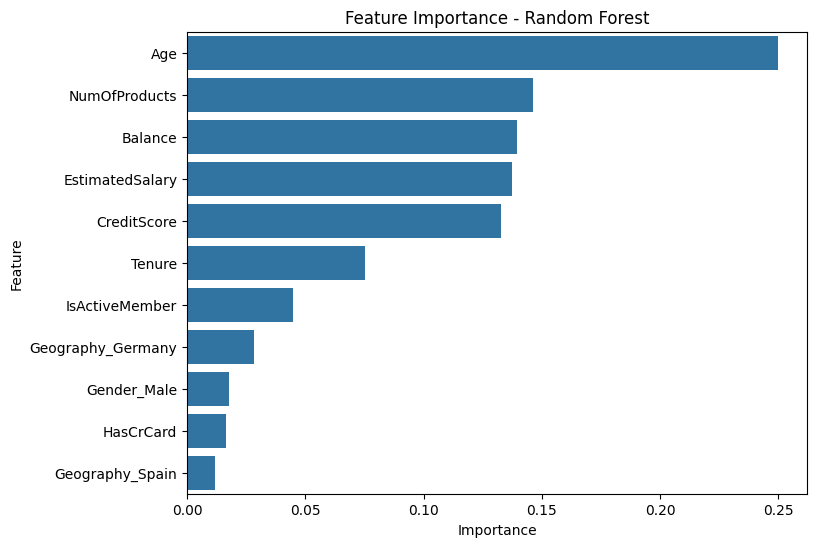

In [15]:
rf_model = RandomForestClassifier(n_estimators=500, max_depth=25, min_samples_split=4, min_samples_leaf=1, max_features='sqrt', random_state=42)
rf_model.fit(X_train, y_train)

# Plotting feature importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importance - Random Forest')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

### Step 6: Visualizing Key Insights

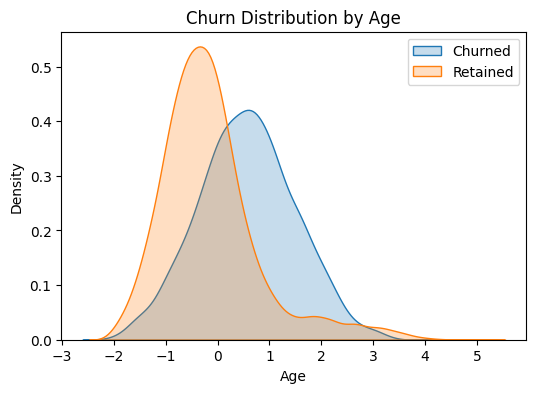

In [16]:
# Churn vs Age Distribution
plt.figure(figsize=(6, 4))
sns.kdeplot(data[data['Exited'] == 1]['Age'], label='Churned', fill=True)
sns.kdeplot(data[data['Exited'] == 0]['Age'], label='Retained', fill=True)
plt.title('Churn Distribution by Age')
plt.legend()
plt.show()

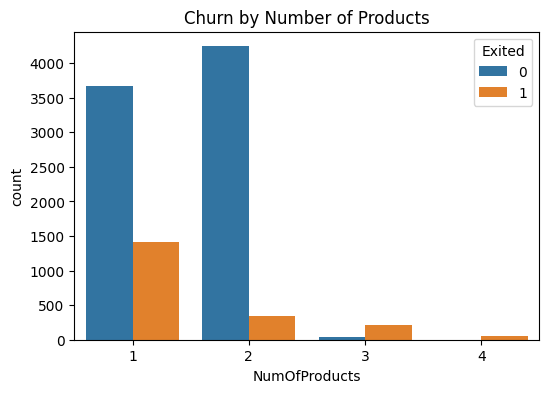

In [17]:
# Churn vs Number of Products
plt.figure(figsize=(6, 4))
sns.countplot(x='NumOfProducts', hue='Exited', data=data)
plt.title('Churn by Number of Products')
plt.show()

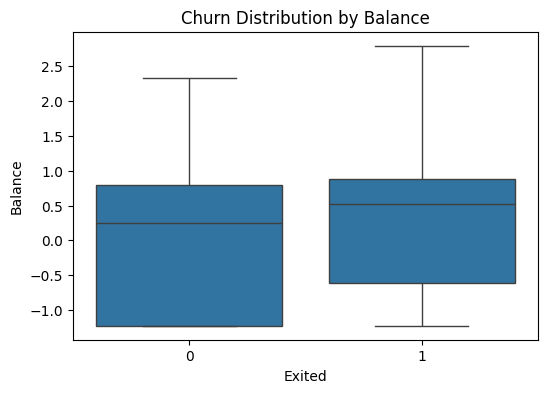

In [18]:
# Churn vs Balance Distribution
plt.figure(figsize=(6, 4))
sns.boxplot(x='Exited', y='Balance', data=data)
plt.title('Churn Distribution by Balance')
plt.show()